In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import *
import imageio

In [3]:
path = Path('/kaggle/input/Kannada-MNIST')
path.ls()


[PosixPath('/kaggle/input/Kannada-MNIST/train.csv'),
 PosixPath('/kaggle/input/Kannada-MNIST/Dig-MNIST.csv'),
 PosixPath('/kaggle/input/Kannada-MNIST/test.csv'),
 PosixPath('/kaggle/input/Kannada-MNIST/sample_submission.csv')]

In [4]:
train_data = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
predict_data = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')

In [5]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.shape

(60000, 785)

In [8]:
predict_data.describe()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.0,5000.0,5000.0
mean,2499.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04780,...,0.191600,0.112600,0.109800,0.078000,0.0,0.0,0.039800,0.0,0.0,0.0
std,1443.520003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.37997,...,6.077753,4.859161,4.766832,4.080104,0.0,0.0,2.814285,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
25%,1249.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
50%,2499.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
75%,3749.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
max,4999.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.00000,...,255.000000,255.000000,255.000000,255.000000,0.0,0.0,199.000000,0.0,0.0,0.0


In [9]:
predict_data.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
predict_data.shape

(5000, 785)

In [11]:
print(f'train_data shape : {train_data.shape}')
print(f'predict_data shape  : {predict_data.shape}')


train_data shape : (60000, 785)
predict_data shape  : (5000, 785)


In [12]:
def to_img_shape(data_X, data_y=[]):
    data_X = np.array(data_X).reshape(-1,28,28)
    data_X = np.stack((data_X,)*3, axis=-1)
    data_y = np.array(data_y)
    return data_X,data_y

In [13]:
train_data_X, train_data_y = train_data.loc[:,'pixel0':'pixel783'], train_data['label']

In [14]:
print(f'train_data shape : {train_data_X.shape}')
print(f'train_data_y shape : {train_data_y.shape}')

train_data shape : (60000, 784)
train_data_y shape : (60000,)


In [15]:
from sklearn.model_selection import train_test_split

train_X, validation_X, train_y, validation_y = train_test_split(train_data_X, train_data_y, test_size=0.20,random_state=7,stratify=train_data_y)


In [16]:
print(f'train_X shape : {train_X.shape}')
print(f'train_y shape : {train_y.shape}')
print(f'validation_X shape : {validation_X.shape}')
print(f'validation_y shape : {validation_y.shape}')

train_X shape : (48000, 784)
train_y shape : (48000,)
validation_X shape : (12000, 784)
validation_y shape : (12000,)


In [17]:
train_X,train_y = to_img_shape(train_X,train_y)
validation_X,validation_y = to_img_shape(validation_X,validation_y)

In [18]:
print(f'train_X shape : {train_X.shape}')
print(f'train_y shape : {train_y.shape}')
print(f'validation_X shape : {validation_X.shape}')
print(f'validation_y shape : {validation_y.shape}')

train_X shape : (48000, 28, 28, 3)
train_y shape : (48000,)
validation_X shape : (12000, 28, 28, 3)
validation_y shape : (12000,)


In [19]:
def save_imgs(path:Path, data, labels):
    path.mkdir(parents=True,exist_ok=True)
    for label in np.unique(labels):
        (path/str(label)).mkdir(parents=True,exist_ok=True)
    for i in range(len(data)):
        if(len(labels)!=0):
            imageio.imsave( str( path/str(labels[i])/(str(i)+'.jpg') ), data[i] )
        else:
            imageio.imsave( str( path/(str(i)+'.jpg') ), data[i] )

save_imgs(Path('/data/train'),train_X,train_y)
save_imgs(Path('/data/valid'),validation_X,validation_y)

In [20]:
path = Path('/data')
path.ls()

[PosixPath('/data/valid'), PosixPath('/data/train')]

In [21]:
tfms = get_transforms(do_flip=False )

In [22]:
data = (ImageList.from_folder('/data/') 
        .split_by_folder()          
        .label_from_folder()        
        .add_test_folder()          
        .transform(tfms, size=64)   
        .databunch())

In [23]:
#Another way to create data bunch
#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

In [24]:
data

ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
5,5,5,5,5
Path: /data;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
5,5,5,5,5
Path: /data;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /data

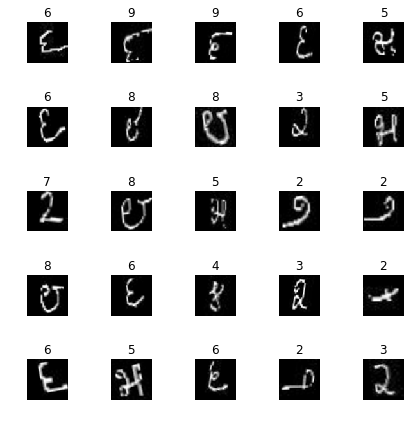

In [25]:
data.show_batch(5,figsize=(6,6))


In [26]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10, 48000, 12000)

In [27]:
!mkdir -p /root/.cache/torch/checkpoints/
!cp /kaggle/input/fast-ai-models/resnet50-19c8e357.pth /root/.cache/torch/checkpoints/resnet50-19c8e357.pth

In [28]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], model_dir=Path('/kaggle/input/fast-ai-models'))

In [29]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.349929,0.137962,0.047500,0.952500,02:23
1,0.115863,0.046469,0.013333,0.986667,02:23
2,0.078943,0.030247,0.009500,0.990500,02:21
3,0.045404,0.023015,0.007167,0.992833,02:21
4,0.044736,0.020800,0.006667,0.993333,02:23


In [30]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

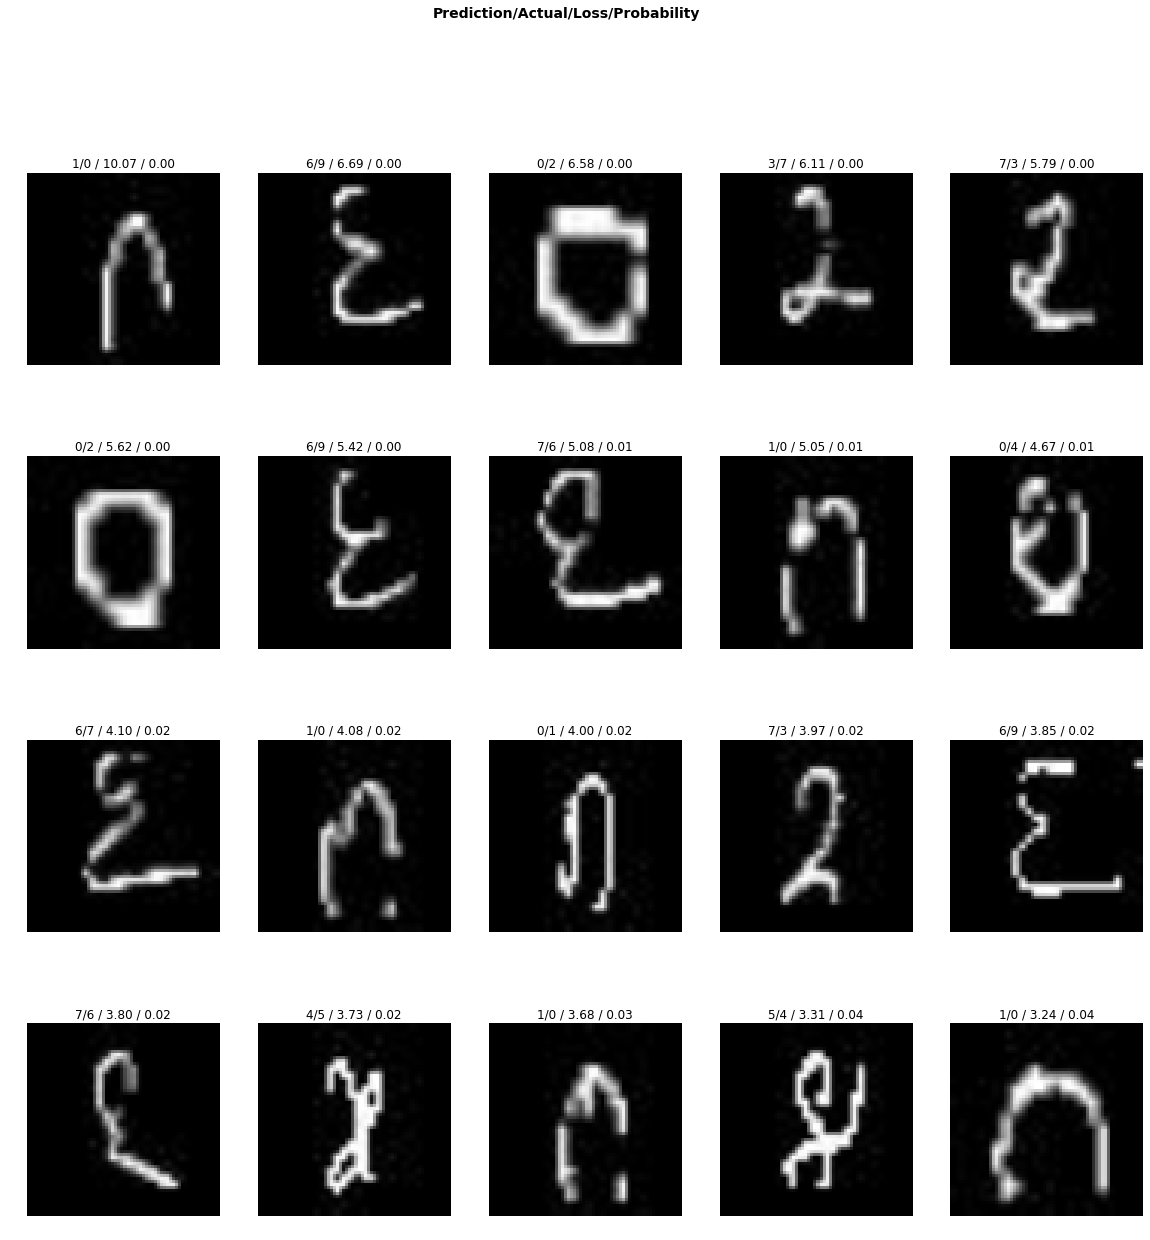

In [31]:
interp.plot_top_losses(20, figsize=(20,20))

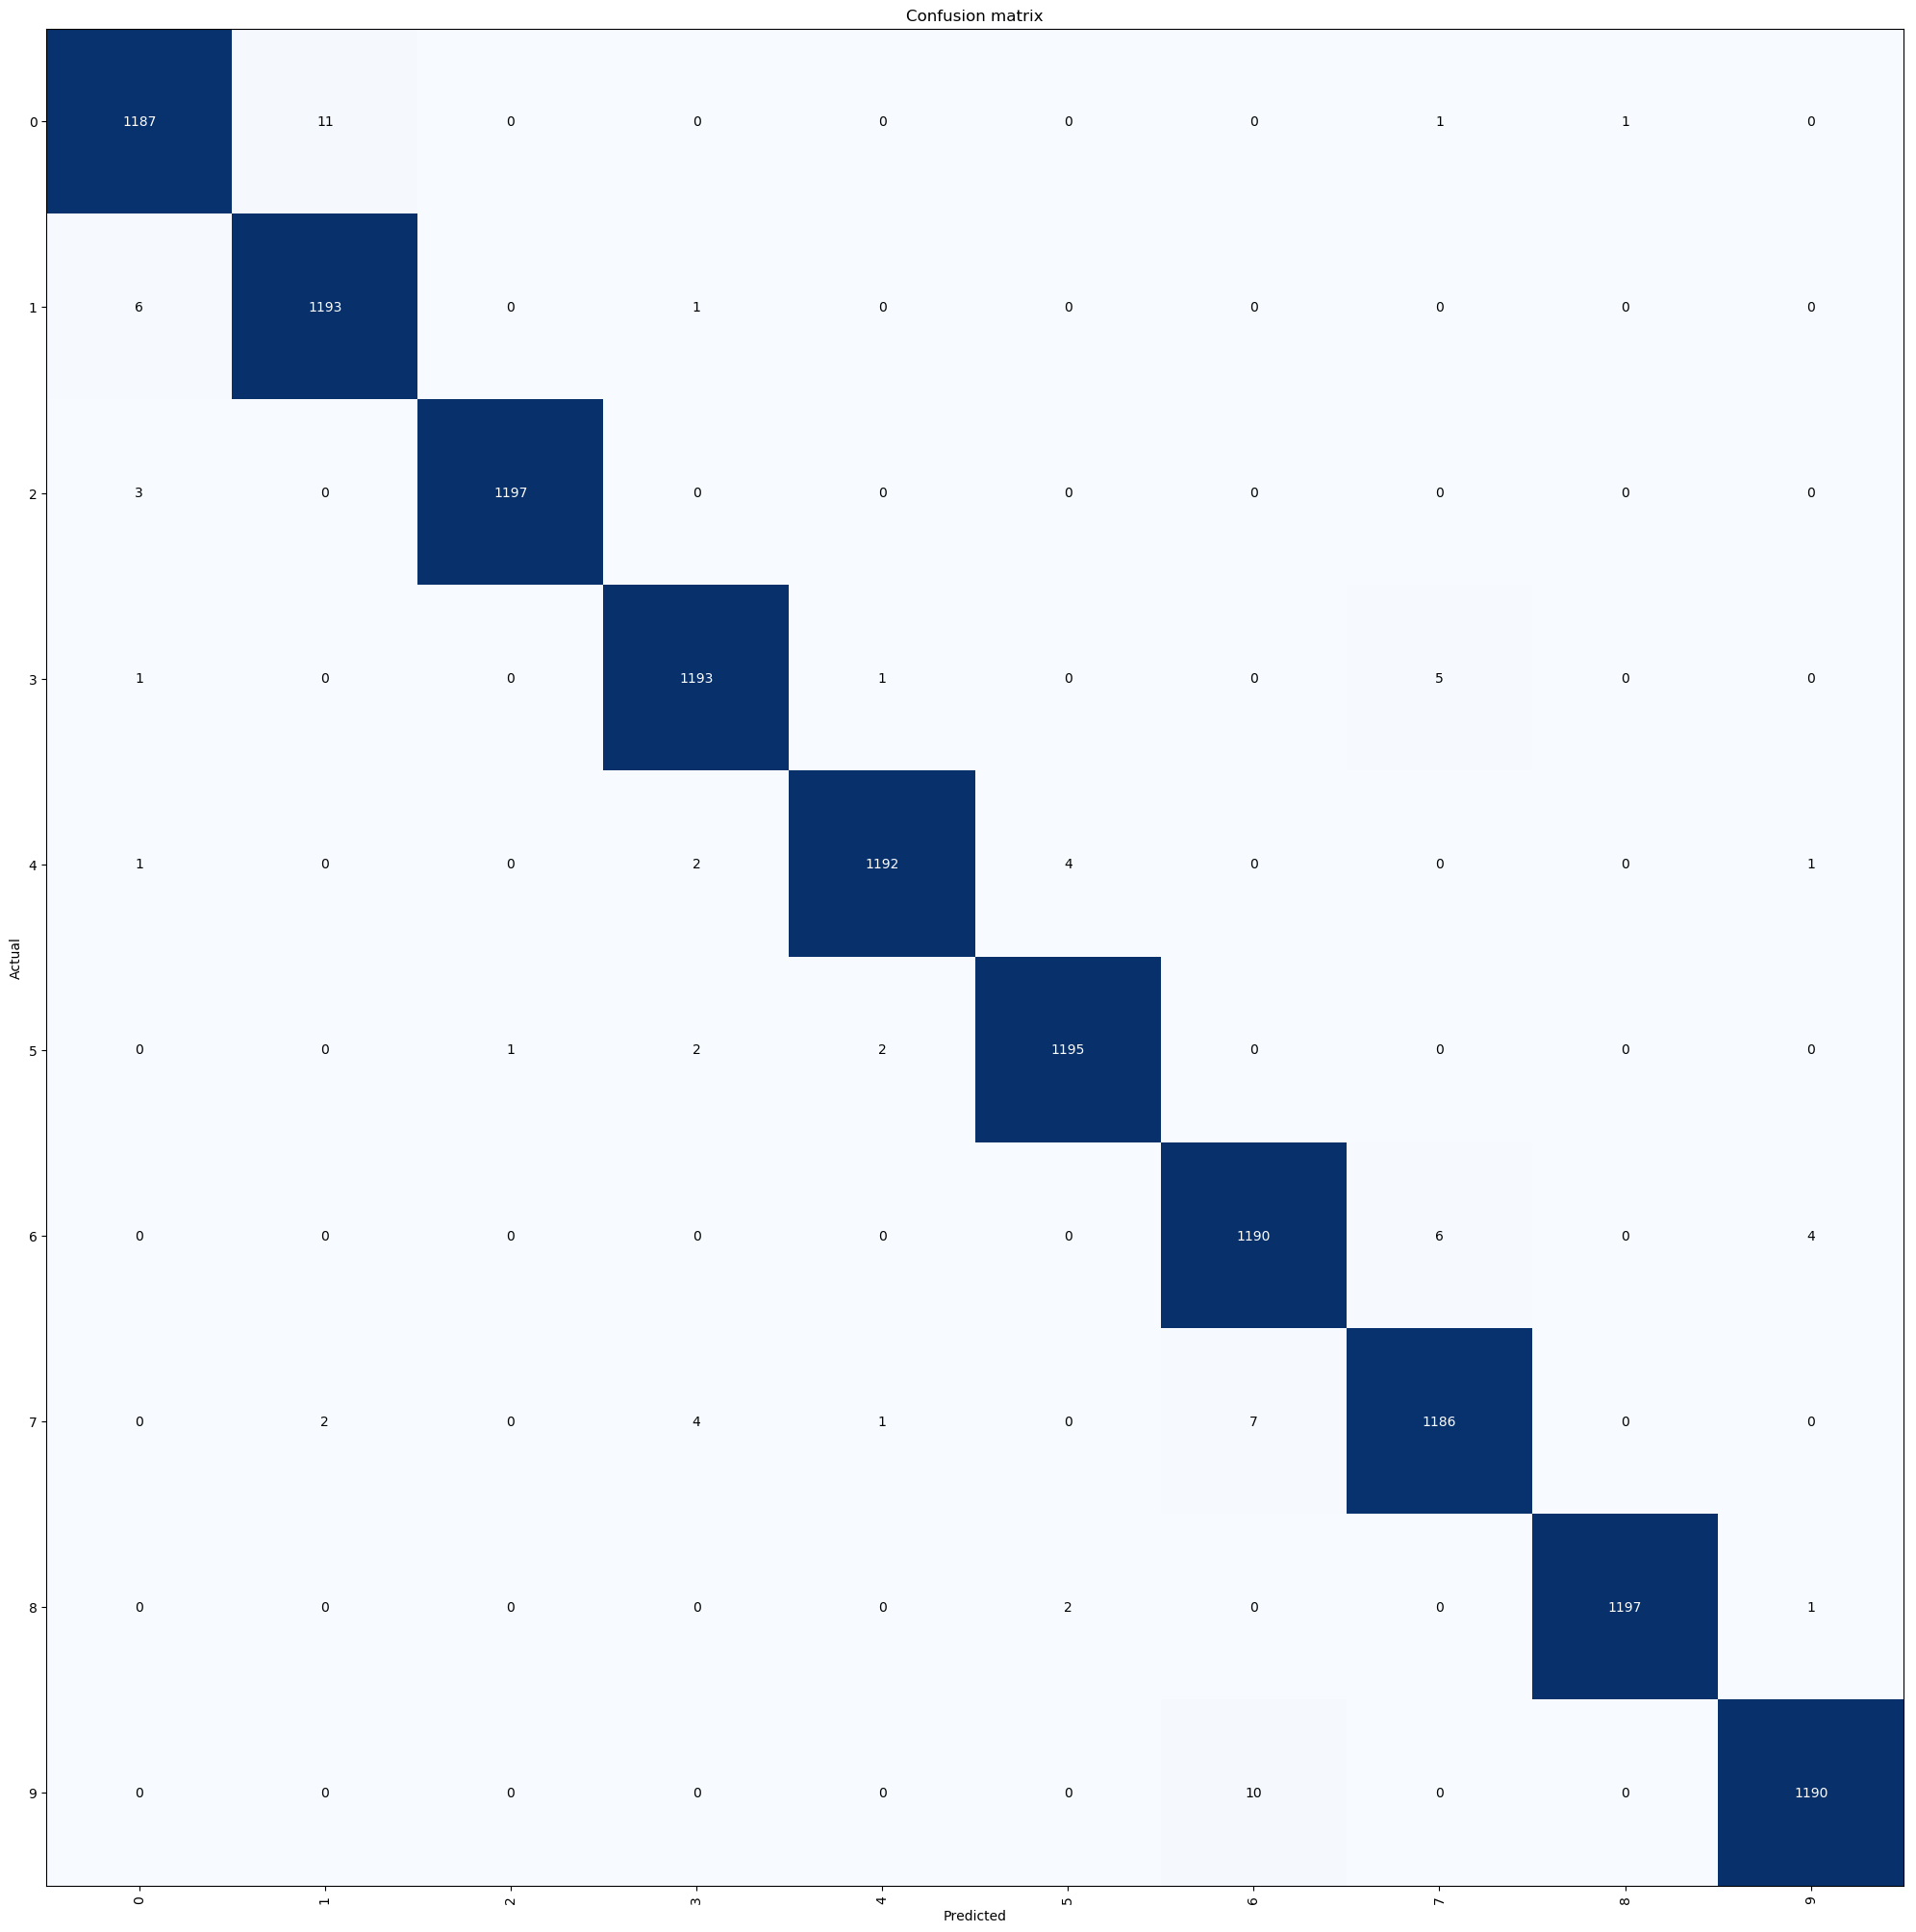

In [32]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=100)

In [33]:
interp.most_confused(min_val=2)

[('0', '1', 11),
 ('9', '6', 10),
 ('7', '6', 7),
 ('1', '0', 6),
 ('6', '7', 6),
 ('3', '7', 5),
 ('4', '5', 4),
 ('6', '9', 4),
 ('7', '3', 4),
 ('2', '0', 3),
 ('4', '3', 2),
 ('5', '3', 2),
 ('5', '4', 2),
 ('7', '1', 2),
 ('8', '5', 2)]

In [34]:
learn.model_dir = '/kaggle/output/fast-ai-models/'

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


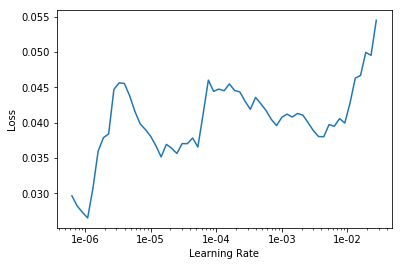

In [36]:
learn.recorder.plot()

In [37]:
lr = slice(1e-04)

In [38]:
learn.save('stage-1')

In [39]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(3,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.034862,0.019105,0.005917,0.994083,02:28
1,0.027529,0.016323,0.005500,0.994500,02:24
2,0.027328,0.014386,0.004417,0.995583,02:22


In [41]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

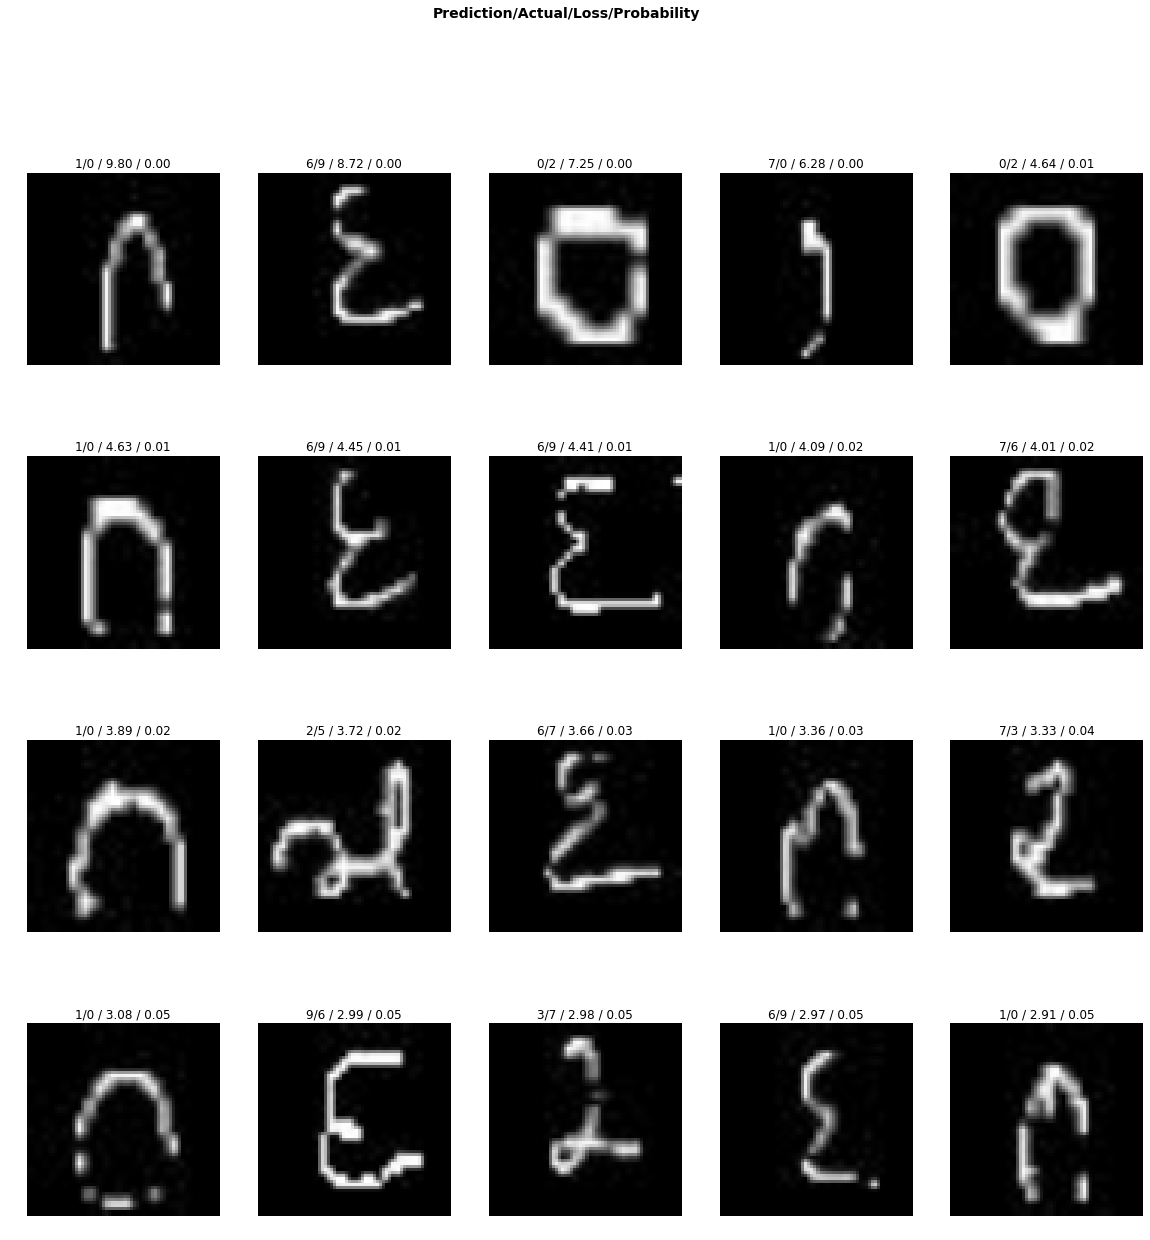

In [42]:
interp.plot_top_losses(20, figsize=(20,20))

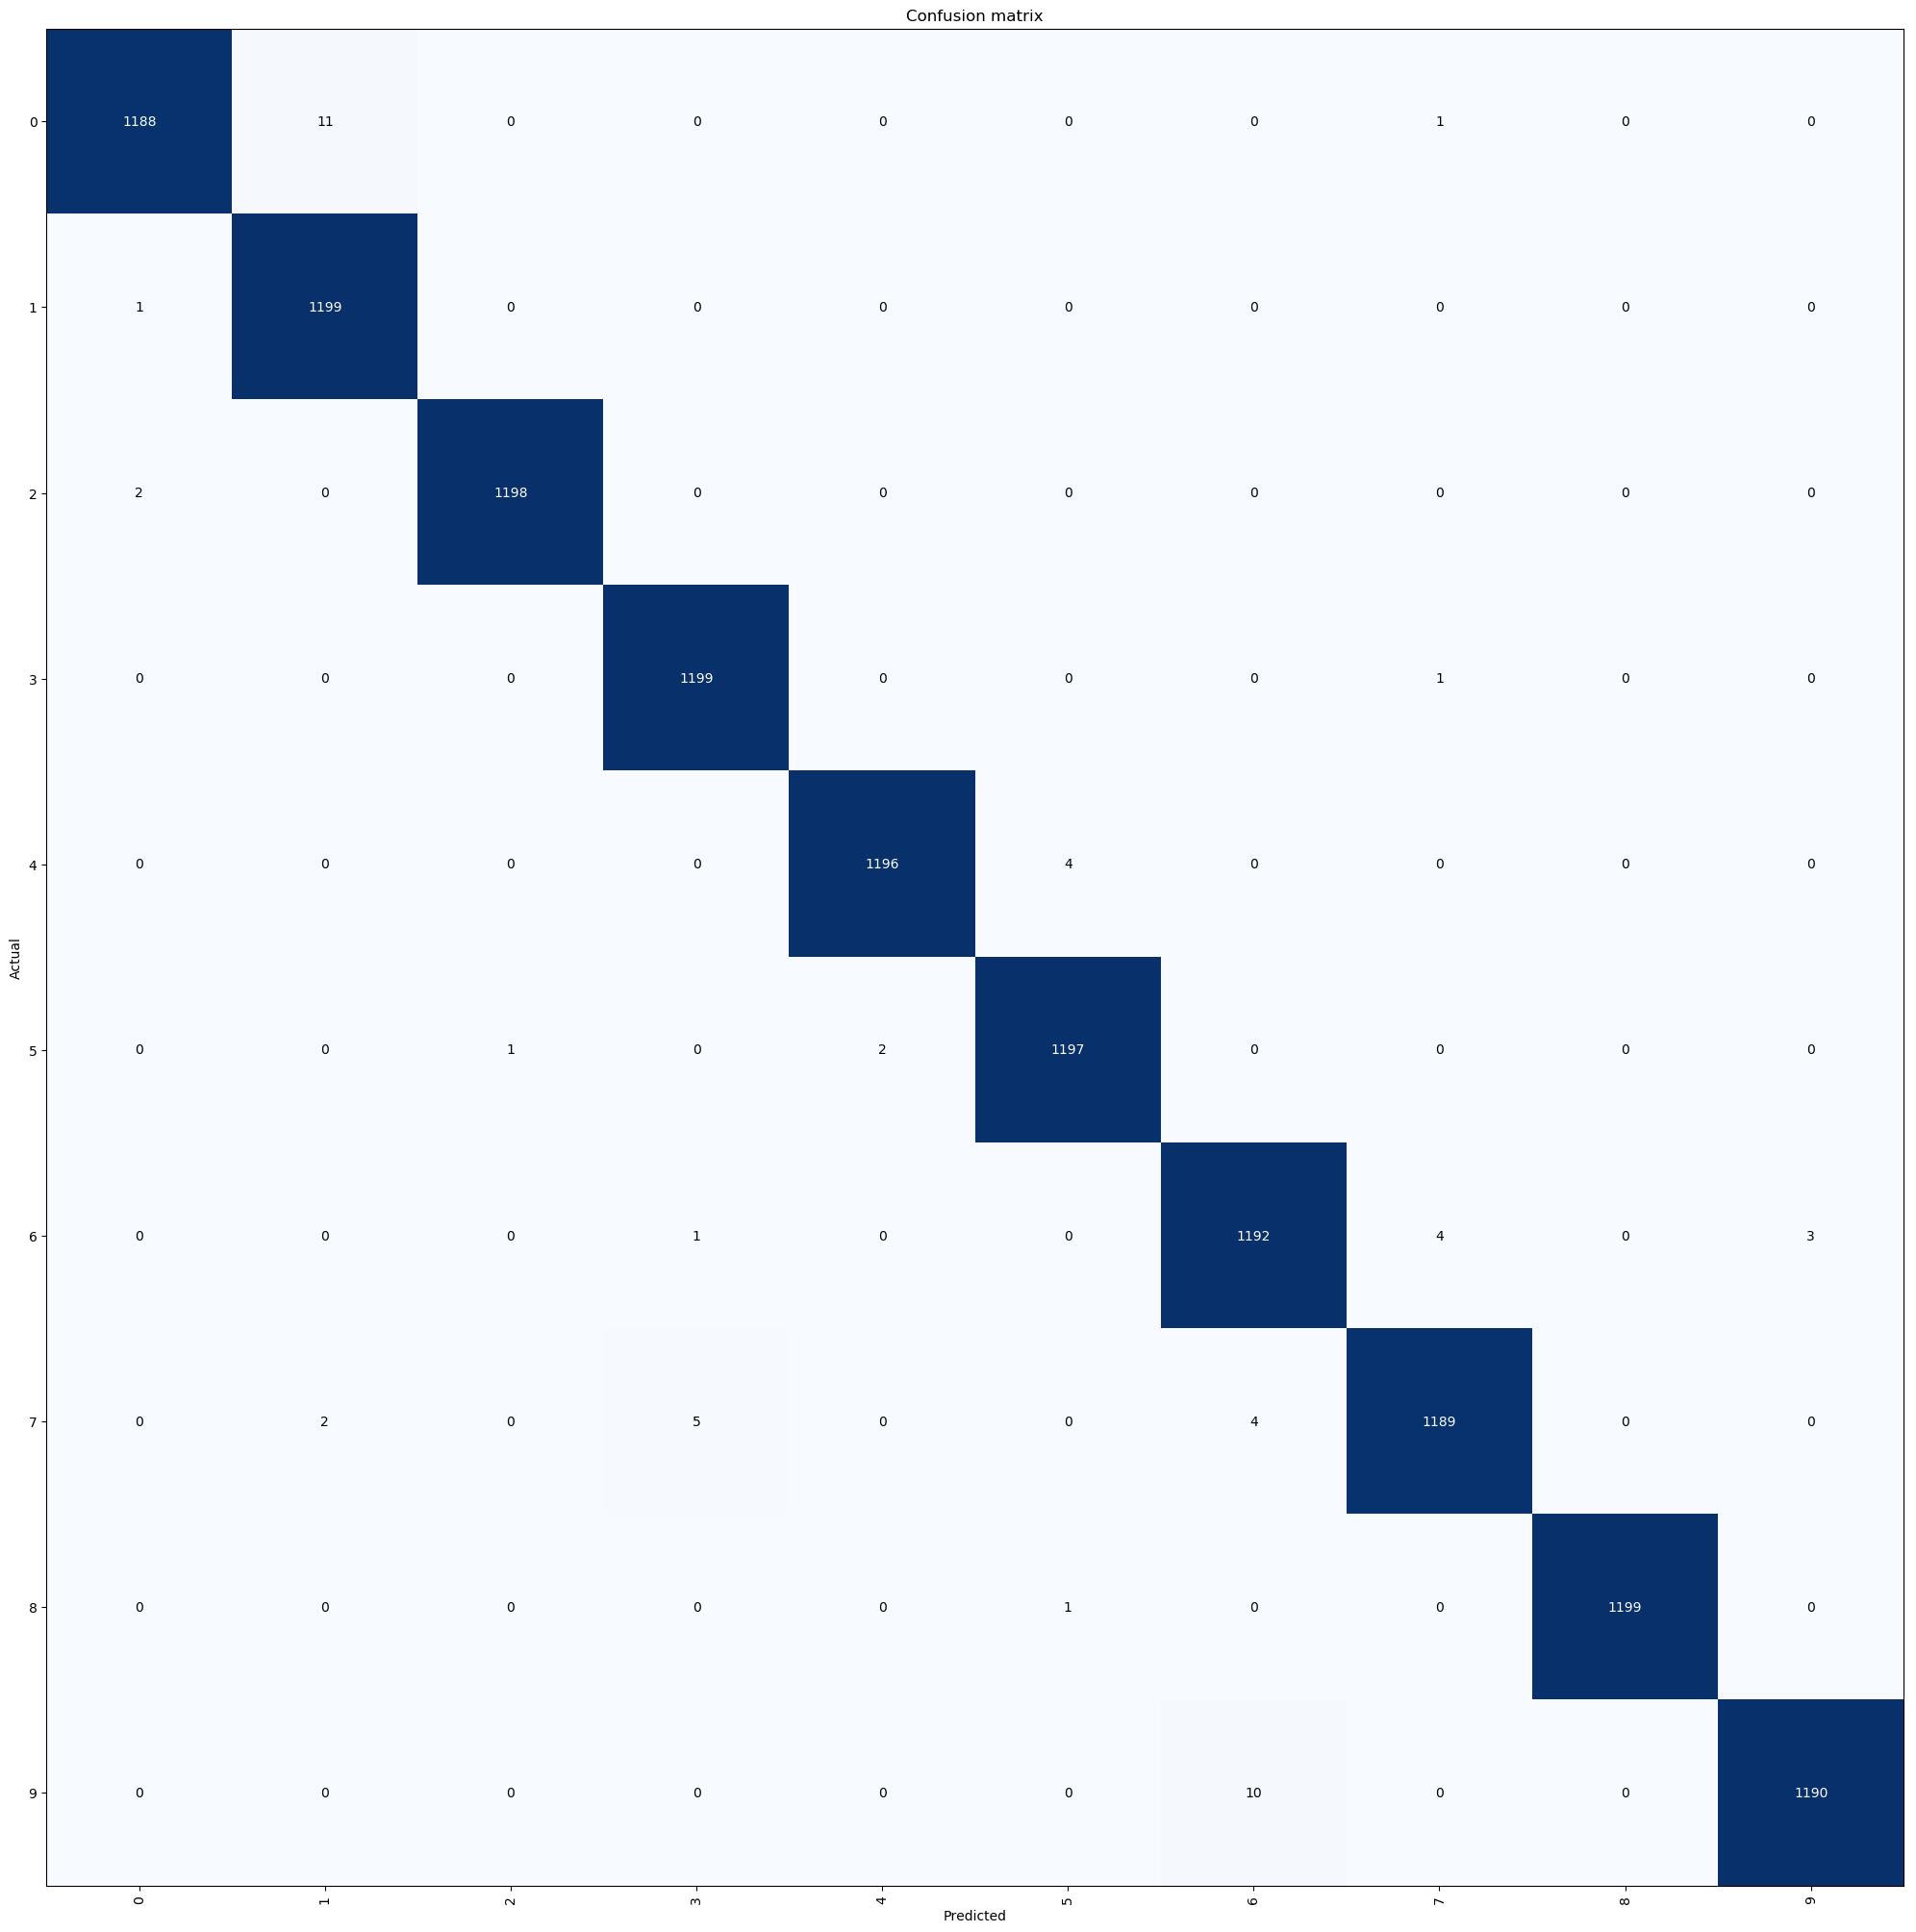

In [43]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=100)

In [44]:
interp.most_confused(min_val=2)

[('0', '1', 11),
 ('9', '6', 10),
 ('7', '3', 5),
 ('4', '5', 4),
 ('6', '7', 4),
 ('7', '6', 4),
 ('6', '9', 3),
 ('2', '0', 2),
 ('5', '4', 2),
 ('7', '1', 2)]

In [45]:
learn.save('stage-2')

In [46]:
predict_data.drop('id',axis = 'columns',inplace = True)
sub_df = pd.DataFrame(columns=['id','label'])

In [47]:
my_predict_data = np.array(predict_data)

In [48]:
# Handy function to get the image from the tensor data
def get_img(data):
    t1 = data.reshape(28,28)/255
    t1 = np.stack([t1]*3,axis=0)
    img = Image(FloatTensor(t1))
    return img

In [49]:
from fastprogress import progress_bar
mb=progress_bar(range(my_predict_data.shape[0]))

In [50]:
for i in mb:
    timg=my_predict_data[i]
    img = get_img(timg)
    sub_df.loc[i]=[i+1,int(learn.predict(img)[1])]

In [51]:
def decr(ido):
    return ido-1

sub_df['id'] = sub_df['id'].map(decr)
sub_df.to_csv('submission.csv',index=False)

In [52]:
# Displaying the submission file
sub_df.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
